In [1]:
import sys

# laptop
sys.path.append( '/home/greg/current/NMEG_utils/py_modules/' )

# UNM desktop
#sys.path.append( '..\\NMEG_utils\\py_modules\\' )
#af_path = 'C:\\Research_Flux_Towers\\Ameriflux_files\\'
#fig_path = 'figures\\multiyear_figs\\'

import load_nmeg as ld
import transform_nmeg as tr
import plot_nmeg as nmegplt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import ipdb as ipdb

%matplotlib inline
sns.set_style("white")

/home/greg/data/anaconda3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [21]:
data_path = '/home/greg/current/NMEG_utils/processed_data/daily_aflx/'
fig_path = '../figures/multiyear_figs/'

# Years to load
start = 2007
end = 2015
# Sites to load (pulls list of AF sites from plot_nmeg module)
sites = ['Seg', 'Sen']
# Fill a dict with multiyear dataframes for each site in sites
daily = { x : 
         ld.load_local_file( data_path + 'US-' + x + '_daily_aflx.csv')
         for x in sites }
d = pd.Panel(daily)

ftp_path = '/home/greg/sftp/eddyflux/Ameriflux_files/provisional/'
hourly = { x : 
          ld.get_multiyr_aflx( 'US-' + x, ftp_path, gapfilled=True, startyear=start, endyear=end) 
          for x in sites }

Parsing /home/greg/current/NMEG_utils/processed_data/daily_aflx/US-Seg_daily_aflx.csv
Parsing /home/greg/current/NMEG_utils/processed_data/daily_aflx/US-Sen_daily_aflx.csv
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2007_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2008_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2009_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2010_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2011_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2012_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2013_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2014_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2015_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_fi

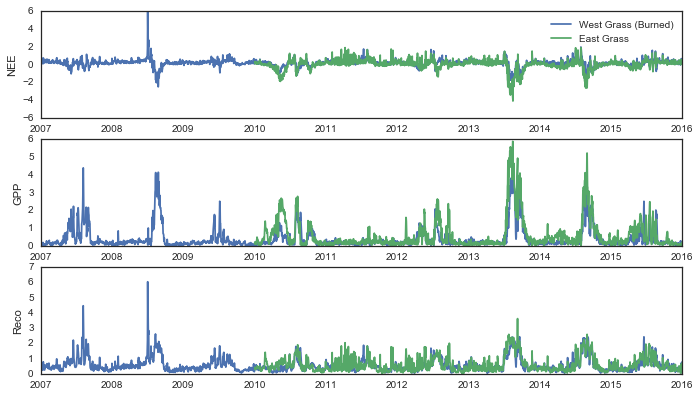

In [3]:
fig1 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(3, 1, 1)
ax.plot(d.Seg.index, d.Seg.FC_F_g_int)
ax.plot(d.Seg.index, d.Sen.FC_F_g_int)
ax.set_ylabel('NEE')
plt.legend(['West Grass (Burned)', 'East Grass'])
ax = plt.subplot(3, 1, 2)
ax.plot(d.Seg.index, d.Seg.GPP_g_int)
ax.plot(d.Seg.index, d.Sen.GPP_g_int)
ax.set_ylabel('GPP')
ax = plt.subplot(3, 1, 3)
ax.plot(d.Seg.index, d.Seg.RECO_g_int)
ax.plot(d.Seg.index, d.Sen.RECO_g_int)
ax.set_ylabel('Reco')


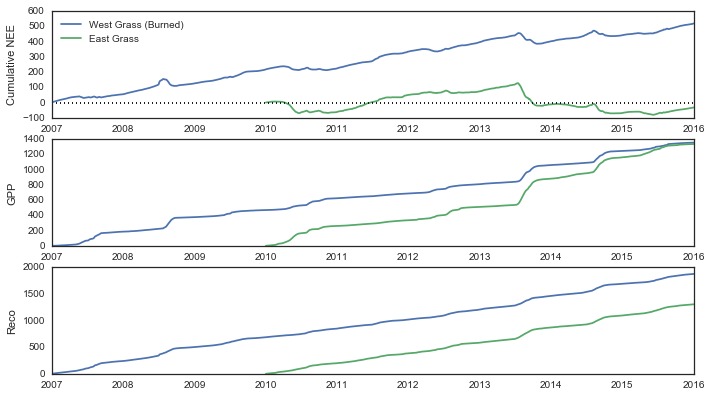

In [4]:
fig2 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(3, 1, 1)
ax.plot(d.Seg.index, np.cumsum(d.Seg.FC_F_g_int))
ax.plot(d.Seg.index, np.cumsum(d.Sen.FC_F_g_int))
ax.axhline(y=0, xmin=0, xmax=1, ls=':', color='k')
ax.set_ylabel('Cumulative NEE')
plt.legend(['West Grass (Burned)', 'East Grass'], loc='upper left')
ax = plt.subplot(3, 1, 2)
ax.plot(d.Seg.index, np.cumsum(d.Seg.GPP_g_int))
ax.plot(d.Seg.index, np.cumsum(d.Sen.GPP_g_int))
ax.set_ylabel('GPP')
ax = plt.subplot(3, 1, 3)
ax.plot(d.Seg.index, np.cumsum(d.Seg.RECO_g_int))
ax.plot(d.Seg.index, np.cumsum(d.Sen.RECO_g_int))
ax.set_ylabel('Reco')

fig2.savefig( fig_path + 'Sev_grass_cum.svg')

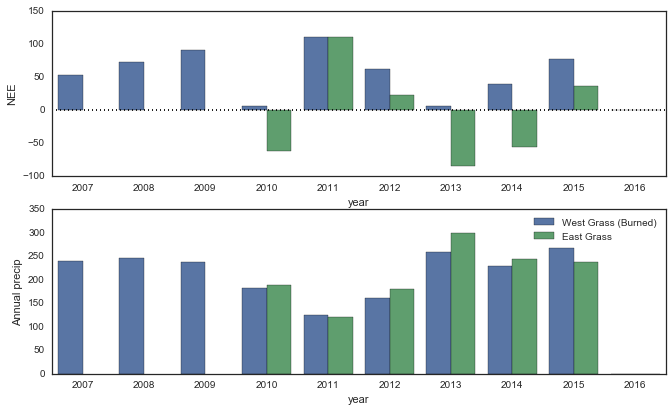

In [5]:
gby = d.Seg.groupby(d.Seg.index.year)
asums = gby.sum()
asums['site'] = 'West Grass (Burned)'
gby = d.Sen.groupby(d.Sen.index.year)
asums2 = gby.sum()
asums2['site'] = 'East Grass'
new = pd.concat([asums, asums2])
new['year'] = new.index
#new = pd.melt(new, id_vars=['year', 'site'], value_vars=['FC_F_g_int', 'P_F_sum'])
#print(new)
#sns.factorplot('year', 'value', hue='site', data=new, row='variable', kind='bar')
#g = sns.FacetGrid(new, row="variable", margin_titles=True)
#g.map(sns.barplot(x='year', y='value', label='site', data=new), color="steelblue", lw=0)
fig3 = plt.figure(figsize=( 11, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 1, 1)
sns.barplot(x='year', y='FC_F_g_int', hue='site', data=new, ax=ax1)
ax1.axhline(y=0, xmin=0, xmax=1, ls=':', color='k')
ax1.set_ylabel('NEE')
ax1.legend_.remove()
ax2 = plt.subplot(2, 1, 2)
sns.barplot(x='year', y='P_F_sum', hue='site', data=new, ax=ax2)
ax2.legend(loc='best')
ax2.set_ylabel('Annual precip')
ax2.set_ylim([0, 350])

fig3.savefig( fig_path + 'Sev_grass_annsums.svg')

In [15]:
asums.loc[2010:2015,:].mean()

GPP_g_int            147.639351
RECO_g_int           197.952989
FC_F_g_int            50.313638
ET_mm_24hint_0       237.777427
P_F_sum              203.516135
TA_F_avg            4996.879505
RH_F_avg           14555.751732
SW_IN_F_avg        84536.919179
RNET_F_avg         25116.870181
VPD_F_avg            468.002150
PAR_avg           177695.673183
LE_F_avg            6753.584709
H_F_avg            17269.525387
TA_F_min            2209.439822
VPD_F_min            158.068852
TA_F_max            7600.413805
VPD_F_max            853.657166
ET_mm_dayint         225.360103
PET_mm_dayint        463.682823
dtype: float64

In [14]:
asums2.loc[2010:2015,:].mean()

GPP_g_int            222.586865
RECO_g_int           217.193416
FC_F_g_int            -5.393449
ET_mm_24hint_0       216.902729
P_F_sum              211.421138
TA_F_avg            4835.105187
RH_F_avg           15349.686706
SW_IN_F_avg        86451.633690
RNET_F_avg         31752.753264
VPD_F_avg            449.810646
PAR_avg           195897.940862
LE_F_avg            6156.974240
H_F_avg            19305.760446
TA_F_min            1849.613660
VPD_F_min            133.876644
TA_F_max            7568.283823
VPD_F_max            842.874812
ET_mm_dayint         205.746653
PET_mm_dayint        479.465210
dtype: float64

## Flux uncertainty

In [32]:
eddyproc_path = '/home/greg/sftp/eddyflux/Ameriflux_files/provisional/eddyproc_uncertainty/'
seg_unc = ld.get_multiyr_eddyproc('Seg', eddyproc_path, 2007, 2015)
sen_unc = ld.get_multiyr_eddyproc('Sen', eddyproc_path, 2010, 2015)

Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/eddyproc_uncertainty/Seg/DataSetafterFluxpart_2007.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/eddyproc_uncertainty/Seg/DataSetafterFluxpart_2008.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/eddyproc_uncertainty/Seg/DataSetafterFluxpart_2009.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/eddyproc_uncertainty/Seg/DataSetafterFluxpart_2010.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/eddyproc_uncertainty/Seg/DataSetafterFluxpart_2011.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/eddyproc_uncertainty/Seg/DataSetafterFluxpart_2012.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/eddyproc_uncertainty/Seg/DataSetafterFluxpart_2013.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/eddyproc_uncertainty/Seg/DataSetafterFluxpart_2014.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/eddyproc_un

In [38]:
hourly_unc = hourly.copy()
hourly_unc['Seg'] = hourly_unc['Seg'].join(seg_unc.NEE_fs_unc) 
hourly_unc['Sen'] = hourly_unc['Sen'].join(sen_unc.NEE_fs_unc)

hourly_unc['Seg'].columns

Index(['YEAR', 'DTIME', 'TA_F', 'TA_F_FLAG', 'RH_F', 'RH_F_FLAG', 'VPD_F',
       'VPD_F_FLAG', 'SW_IN_F', 'SW_IN_F_FLAG', 'P_F', 'P_F_FLAG', 'LW_IN_F',
       'LW_IN_F_FLAG', 'RNET_F', 'RNET_F_FLAG', 'USTAR', 'WD', 'WS', 'PA',
       'PAR', 'SW_OUT', 'LW_OUT', 'FC_F', 'FC_F_FLAG', 'LE_F', 'LE_F_FLAG',
       'H_F', 'H_F_FLAG', 'CO2', 'H2O', 'GPP', 'RECO', 'NEE_fs_unc'],
      dtype='object')

In [47]:
# Sum in quadrature (sqrt of summed squared uncertainty values)
hourly_unc['Seg']['NEE_fs_unc_sq'] = hourly_unc['Seg'].NEE_fs_unc**2
gby = hourly_unc['Seg'].NEE_fs_unc_sq.groupby(hourly_unc['Seg'].index.year)
np.sqrt(gby.sum())[0:9].mean()

72.50050733407615

In [50]:
hourly_unc['Sen']['NEE_fs_unc_sq'] = hourly_unc['Sen'].NEE_fs_unc**2
gby = hourly_unc['Sen'].NEE_fs_unc_sq.groupby(hourly_unc['Sen'].index.year)
np.sqrt(gby.sum())[0:6].mean()

92.18536796545543

### Raw Sevilleta core ANPP data

These are data from ANPP surveys at 4 core sites and there are 2 types of survey:

1. Volume data - see <http://sev.lternet.edu/data/sev-129>
2. Destructive biomass (weights) - see <http://sev.lternet.edu/data/sev-157>

In [6]:
# Core quadrat volume based ANPP data 
vol_npp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev-129/sev129_nppcorequadrat_20150819.txt")
vol_npp.head()


,year,season,date,site,web,plot,quad,treatment,species,obs,cover,height,count,comment
0,1999,1,2/3/1999,C,1,E,1,C,DAPU7,1,0.50,4,13,NaN
1,1999,1,2/3/1999,C,1,E,1,C,DAPU7,2,0.10,2,16,NaN
2,1999,1,2/3/1999,C,1,E,1,C,GUSA2,1,0.01,4,2,NaN
3,1999,1,2/3/1999,C,1,E,1,C,GUSA2,2,0.10,5,1,NaN
4,1999,1,2/3/1999,C,1,E,1,C,GUSA2,3,0.50,12,1,NaN


In [8]:
# I think these are the destructive (weights) used to correlate with volume
wt_npp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev157_nppweight_20160119_0.txt")
wt_npp.head()


,Year,Season,Date,Site,Treatment,Species,Observation,Count,Cover,Height,Live_Weight,Dead_Weight,Book,Comments
0,1999,1,2/4/1999,C,C,ARDI5,1,1,0.10,14,0.04,-888.0,99-1,NaN
1,1999,1,2/4/1999,C,C,ARDI5,2,1,0.10,14,0.06,-888.0,99-1,NaN
2,1999,1,2/4/1999,C,C,ARDI5,3,1,0.10,21,0.10,-888.0,99-1,NaN
3,1999,1,2/4/1999,C,C,ARDI5,4,1,0.25,20,0.37,-888.0,99-1,NaN
4,1999,1,2/4/1999,C,C,ARDI5,5,1,0.25,20,0.29,-888.0,99-1,NaN


### Combined volume and destructive (allometry) ANPP data 

see <http://sev.lternet.edu/data/sev-182>

Pretty sure this is the combination of the two datasets above into actual biomass numbers

For the most part these plots agree with what can be seen in [Esteban Muldavin's 2008 paper](https://dx.doi.org/10.1007/s00442-007-0880-2) for 1999-2004, except that 2004 numbers here are lower. This may be due to missing data (see Methods section of that paper).

In [9]:
allom_npp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev-182/sev182_nppcorewebbiomass_20150817.txt")
print(np.unique(allom_npp.web))
print(np.unique(allom_npp.treatment))
allom_npp.head()

[1 2 3 4 5]
['C']


,year,site,treatment,web,plot,quad,species,wwt,swt,fwt,snpp,fnpp,anpp
0,1999,C,C,1,E,1,CHSE7,0.00,0.00,0.05,0.00,0.05,0.05
1,1999,C,C,1,E,1,CHSES,0.00,0.00,0.04,0.00,0.04,0.04
2,1999,C,C,1,E,1,DAPU7,0.12,1.62,2.79,1.49,1.17,2.67
3,1999,C,C,1,E,1,GUSA2,0.79,0.31,18.43,0.00,18.12,18.12
4,1999,C,C,1,E,1,LEFE,0.37,0.17,0.00,0.00,0.00,0.00


B = Blue grama core site
G = Black grama core site
C = Creosote shrub core site

   year  web plotname  quad    wwt    swt     fwt  snpp    fnpp    anpp
0  2002    1        E     1  43.30  22.61  178.22  1.59  155.61  157.21
1  2002    1        E     2   0.84   2.71  142.21  2.41  139.50  141.91
2  2002    1        E     3   0.70   2.58   68.39  1.95   65.87   67.82
3  2002    1        E     4   1.38   1.23   88.46  0.46   87.26   87.71
4  2002    1        N     1   0.63   2.12   68.31  1.82   66.20   68.01
   year  web plotname  quad    wwt    swt     fwt   snpp    fnpp    anpp
0  1999    1        E     1  25.11  11.77   73.68   0.09   61.95   62.04
1  1999    1        E     2  72.85  25.14  361.92  16.62  337.15  353.77
2  1999    1        E     3  19.31   8.64   82.08   0.78   73.44   74.22
3  1999    1        E     4  22.42   3.11   30.17   0.74   27.07   27.81
4  1999    1        N     1  10.64  17.61   60.80   7.19   43.30   50.48
   year  web plotname  quad     wwt     swt     fwt  snpp   fnpp   anpp
0  1999    1        E     1    1.28    2.55   27.42  1.94 

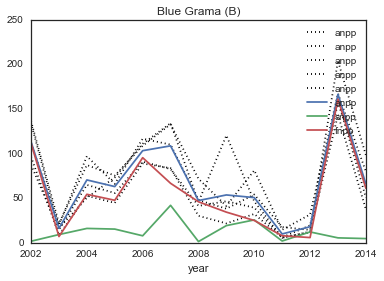

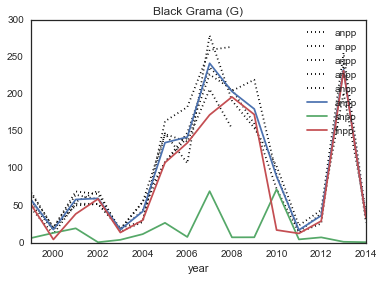

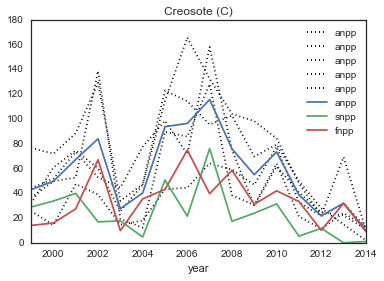

In [13]:
# Run through sites and plot long term npp data
sites = ['B', 'G', 'C']
names = ['Blue Grama (B)', 'Black Grama (G)', 'Creosote (C)']
for i, site in enumerate(sites):
    # Subset by site
    subset = allom_npp[allom_npp.site==site]
    # Rename plot so pandas isn't confused
    subset = subset.rename(columns={'plot':'plotname'})
    # Group by year, web, plot, and quad and sum anpp for all species.
    # This should be total biomass per m2 quad
    gby = subset.groupby(['year', 'web', 'plotname', 'quad'], as_index=False)
    sumanpp = gby.sum()
    print(sumanpp.head())
    # Group by year and take average of these sums
    gby = sumanpp.groupby('year')
    avganpp = gby.mean()
    #print(avganpp.head())
    # Group by year and web and take average of these sums
    gby = sumanpp.groupby(['year', 'web'], as_index=False)
    avgwebanpp = gby.mean()
    #print(avgwebanpp.head())
    # Plot
    plt.figure()
    # Plot individual webs
    for j in np.unique(allom_npp.web):
        idx = avgwebanpp.web==j
        plt.plot(avgwebanpp[idx].year, avgwebanpp[idx].anpp, ':k')
    avganpp.anpp.plot()
    avganpp.snpp.plot()
    avganpp.fnpp.plot()
    
    plt.legend()
    plt.title(names[i])

### Belowground NPP (root ingrowth donuts)

see <http://sev.lternet.edu/data/sev-175>

Note that root weights are in milligrams, and I'm not sure what the area sampled is here...

In [6]:
bnpp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev175_rootingrowth_20160127.txt")
bnpp.head()

,Date,Site,Sample,Depth,Volume,Root_Weight,Notes
0,2005,F,1,0-15,2650,50.6,NaN
1,2005,F,1,15-30,1500,407.6,NaN
2,2005,F,2,0-15,2750,184.5,NaN
3,2005,F,2,15-30,1750,391.0,NaN
4,2005,F,3,0-15,2550,113.7,NaN


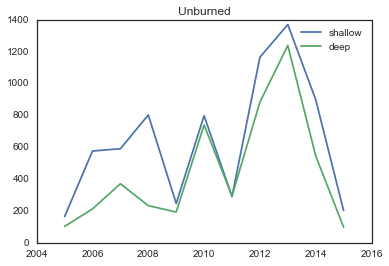

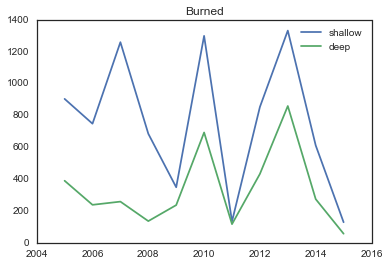

In [7]:
sites = ['DW', 'DWB']
names = ['Unburned', 'Burned']
for i, site in enumerate(sites):
    # Subset by site
    subset = bnpp[bnpp.Site==site]
    # Group by year, site, and depth
    gby = subset.groupby(['Date', 'Site', 'Depth'], as_index=False)
    subset = gby.mean()
    # get deep and shallow
    bnpp_s = subset[subset.Depth=='0-15']
    bnpp_d = subset[subset.Depth=='15-30']
    # Plot
    plt.figure()
    plt.plot(bnpp_s.Date, bnpp_s.Root_Weight)
    plt.plot(bnpp_d.Date, bnpp_d.Root_Weight)
    plt.legend(['shallow', 'deep'])
    plt.title(names[i])

### Notes from  meeting with Scott

* East Grass had a prescribed burned in 2003, most recently, but there were 2 smaller preceeding fires in the area, one in 2001 and one in 1995. The area burned in 1995 reburned in 2003, but the area burned in 2001 did not reburn in 2003. There are some line intercept transects that were measured from 1995 to 2012. The north end of these transects are in the 1995 burn area, and the south ends of them are in the 2001 fire area (not reburned), so the south end should have a community composition recovery history from 2001 to 2012 that could be compared to the core site transects across the road (measured 1989 to 2015).
    
* Look at old Seg data (pre-2007, Kurc and Small)
    
* There is also a mixed grass burned ANPP dataset from the monsoon project on the west side of the road. These may show some indication of recovery from the fire.

## Prescribed burn ANPP data

* Volume data for these plots is here: http://sev.lternet.edu/data/sev-156
* and harvest data (weights) come from here again: http://sev.lternet.edu/data/sev-157

The above 2 datasets are used to generate ANPP here: http://sev.lternet.edu/data/sev-185

In [31]:
burn_npp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev-185/sev185_nppburnbiomass_20150814.txt")
burn_npp.loc[450:500,:]


,year,site,treatment,quad,species,wwt,swt,fwt,snpp,fnpp,anpp
450,2004,G,B,40,GUSA2,0.0,0.22,16.87,0.22,16.66,16.87
451,2004,G,B,40,OECA10,0.0,6.63,0.00,6.63,0.00,6.63
452,2004,G,B,40,PHIN,0.0,4.04,0.00,4.04,0.00,4.04
453,2004,G,B,40,PLPA2,0.0,0.41,0.20,0.41,0.00,0.41
454,2004,G,B,40,SPCFC,0.0,0.00,48.06,0.00,48.06,48.06
455,2004,MG,B,1,ASNU4,0.0,0.01,0.00,0.01,0.00,0.01
456,2004,MG,B,1,BOER4,0.0,0.36,0.52,0.36,0.17,0.52
457,2004,MG,B,1,BOGR2,0.0,20.46,46.59,20.46,26.13,46.59
458,2004,MG,B,1,EUEX4,0.0,0.00,0.01,0.00,0.01,0.01
459,2004,MG,B,1,HODR,0.0,0.76,0.62,0.76,0.00,0.76


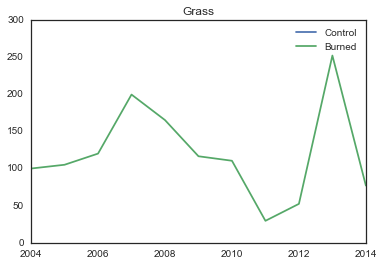

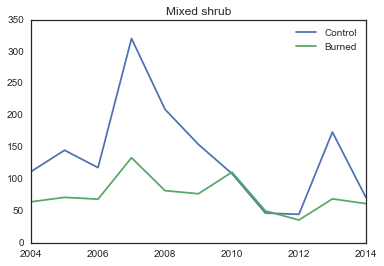

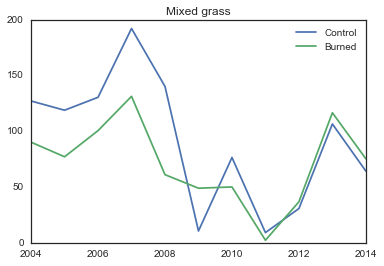

In [22]:
sites = ['G' ,'MS', 'MG']
names = ['Grass', 'Mixed shrub', 'Mixed grass']
for i, site in enumerate(sites):
    # Subset by treatment
    subset = burn_npp[burn_npp.site==site]
    # Group by year, site, treatment, and quad
    gby = subset.groupby(['year', 'site', 'treatment', 'quad'], as_index=False)
    subset = gby.sum()
    gby = subset.groupby(['year', 'site', 'treatment'], as_index=False)
    subset = gby.mean()
    # get deep and shallow
    burnnpp_c = subset[subset.treatment=='C']
    burnnpp_b = subset[subset.treatment=='B']
    # Plot
    plt.figure()
    plt.plot(burnnpp_c.year, burnnpp_c.anpp)
    plt.plot(burnnpp_b.year, burnnpp_b.anpp)
    plt.legend(['Control', 'Burned'])
    plt.title(names[i])

## Deep Well Burn line transects vs unburned transects

Burned transects:

http://sev.lternet.edu/data/sev-84

Unburned transects:

http://sev.lternet.edu/data/sev-4